# Part IA Computing Examples Paper 2 Solutions

Crib for Examples Paper 2 for the Part IA computing course. See end of notebook for license.

Import the modules used in this crib.

In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

import numpy as np

import scipy.io.wavfile
import urllib

from IPython.display import Audio

%matplotlib inline

## Question 1 

(a) There are two natural approaches to this look-up problem in a long, unsorted list of length $n$:

1. Perform linear searches in the unsorted list (average cost of $O(n)$ per look-up)
1. Sort the list by vehicle registration (cost of $O(n \log n)$), and then perform binary   
   searches (average cost of $O(\log n)$ per look-up).

We need to compute the time required for the two algorithms for varying numbers of look-ups ($m$).

We first implement functions that return the actual time cost for searching for a single entry in a list of length $n$ (linear search and binary search), and for sorting for a list of length $n$:

In [2]:
def linear_search_cost(n):
    return 1.0e-8*n

def binary_search_cost(n):
    return 1.0e-6*math.log(n)

def sort_cost(n):
    return 2.0e-5*n*math.log(n)

Now set $n = 26 \times 10^{6}$ (total number of vehicles), and create a list holding the of the number of vehicles entering the congestion zone for each case: 

In [3]:
n = 26.0e6
searches = [1.0e3, 1.0e4, 3.0e5, 5.0e5]

We now compute the cost of linear searches, and the cost of sort followed by binary searches for different $m$:

In [4]:
for m in searches:
    linear_cost = m*linear_search_cost(n)
    binary_cost = sort_cost(n) + m*binary_search_cost(n)
    print("Number of vehicle entries: {}".format(m))
    print("    Linear search time: {}".format(linear_cost))
    print("    Binary search time: {}".format(binary_cost))

Number of vehicle entries: 1000.0
    Linear search time: 260.0
    Binary search time: 8878.29276351969
Number of vehicle entries: 10000.0
    Linear search time: 2600.0
    Binary search time: 8878.446425983555
Number of vehicle entries: 300000.0
    Linear search time: 78000.0
    Binary search time: 8883.39777204139
Number of vehicle entries: 500000.0
    Linear search time: 130000.0
    Binary search time: 8886.812493460588


We see that:

- For $m = 10^3$ and $m = 10^4$, linear search is faster.
- For $m = 3 \times 10^5$ and $m = 5 \times 10^5$, sort followed by binary linear search is 
  faster.
  
For a small number if look-ups, linear search is much faster, whereas for a large number of look-ups sort 
followed by binary search is faster.

(b) We need to find the value of $m$ at which the cost for the two approaches is equal. 
The time costs finding $m$ entries using linear search is:

\begin{equation}
c_{\rm linear} = 10^{-8}  m n
\end{equation}

The time cost to sort list followed by $m$ binary searches is:

\begin{equation}
c_{\rm binary} = \underbrace{2 \times 10^{-5} n \log n}_{\text{sort cost}} + \underbrace{10^{-6} m \log n}_{\text{search cost}}
\end{equation}

Equating the linear and binary sort times,

$$
m = \frac{2 \times 10^{-5} n \log n}{10^{-8}n - 10^{-6} \log n}
$$

For $n = 26 \times 10^{6}$:

In [5]:
n = 26e6
m = (2.0e-5*n*math.log(n))/(1.0e-8*n - 1.0e-6*math.log(n))
print(m)

34149.45670891916


The cross-over point is at around $34000$.

## Question 2

(a) Checks that inputs are valid:

Fast:
- Check that $A$ and $B$ are square (cost: $O(1)$)
- Check that $A$ and $B$ have same shape (cost: $O(1)$)
- Check that $A$ and $B$ are both real or both complex (cost: $O(1)$)
- Warn if $A$ and $B$ are complex - warn only because $A + B$ might be real (cost: $O(1)$)

Slow:
- If $A$ and $B$ are complex, check that $A + B$ is real (cost: $O(n^2)$)
- Check that $A + B$ is symmetric by checking that $\left|(A+B)_{ij} - (A+B)_{ji}\right| < \epsilon$,
  where $\epsilon$ is small. (cost: $O(n^{2})$)


(b) For correctness tests, check computed results for problems with known solutions. E.g., create diagonal matrices and compute eigenvalues (eigenvalues of a diagonal matrix are just the diagonal entries):

In [6]:
import numpy as np
def evals(A, B):
      return np.linalg.eigvalsh(A + B)
    
# Create scaled diagonal matrices    
a, b = 5, 2
A = a*np.eye(4)
B = b*np.eye(4)
print(A)
print(B)

[[5. 0. 0. 0.]
 [0. 5. 0. 0.]
 [0. 0. 5. 0.]
 [0. 0. 0. 5.]]
[[2. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 2.]]


Now compute eigenvalues of $A + B$ (both are diagonal), and check that compute eigenvalues are close to `a+b`.

In [7]:
eigen_vals = evals(A, B)
print(eigen_vals)
assert np.allclose(eigen_vals, a + b)

[7. 7. 7. 7.]


The NumPy function `allclose` has been used to check that the values are close. Exact comparison is not used as the values (floats) might not be precisely the same due to round-off effects.

We now create diagonal matrices with random entries, and check that computed eigenvalues are equal (close) to diagonal entries. To perform the test, we sort the arrays before comparing.

In [8]:
d0, d1 = np.random.rand(8), np.random.rand(8)
D0 = np.diag(d0)
D1 = np.diag(d1)

eigen_vals = evals(D0, D1)
assert np.allclose(sorted(eigen_vals), sorted(d0 + d1))

## Question 3

Error analysis uses Taylor series expansions:

$$
f(x + h) = f(x) + h f^{\prime}(x) + \frac{h^{2}}{2!} f^{\prime\prime}(x)
+ \frac{h^{3}}{3!} f^{\prime\prime\prime}(x) + O(h^{4})
$$

(a) One-sided difference

Inserting the Taylor series expansion into the one-sided difference equation:

\begin{align}
\frac{df}{dx}(x) &\approx \frac{f(x + h) - f(x)}{h} \\
&= \frac{f(x) + h f^{\prime}(x) + O(h^2) - f(x)}{h} \\
&= f^{\prime}(x) + O(h)
\end{align}

This shows that the error for the one-sided difference case is $O(h)$. That is, it is *first-order accurate*. 
If we halve $h$, we expect the error in the derivative to halve. 

(b) Symmetric difference

Inserting the Taylor series expansion into the symmetric difference equation, taking care with signs for 
the $\pm h$ cases:

\begin{align}
\frac{df}{dx}(x) &\approx \frac{f(x + h) - f(x - h)}{2h} \\
&= \frac{f(x) + h f^{\prime}(x) + \frac{h^{2}}{2!} f^{\prime\prime}(x) + O(h^{3}) - 
\left(f(x) - h f^{\prime}(x) + \frac{h^{2}}{2!} f^{\prime\prime}(x) + O(h^{3})\right)}{2h} \\
&= f^{\prime}(x) + O(h^{2})
\end{align}

This shows that the error for the symmetric difference case is $O(h^{2})$. That is, it is *second-order accurate*. 
If we halve $h$, we expect the error in the derivative to reduce by a factor of four.
The extra accuracy for the symmetric difference comes from the second-order terms in the Taylor series having opposite signs and therefore cancelling.

To test for correctness, we can test an implementation for a case with a known analystical solution. For example, 
we can compute $d \sin(x) / dx$ at $x = 1.2$ for different values of $h$:

In [9]:
x = 1.2
H = [1.0e-1, 1.0e-2, 1.0e-3, 1.0e-4]
for h in H:
    one_side_diff = (math.sin(x + h) - math.sin(x))/h
    symm_diff = (math.sin(x + h) - math.sin(x -h))/(2*h)
    print("h =", h)
    print("  One-side error: {:.2e}".format(abs(one_side_diff - math.cos(x))))
    print("  Symmetric error: {:.2e}".format(abs(symm_diff - math.cos(x))))

h = 0.1
  One-side error: 4.72e-02
  Symmetric error: 6.04e-04
h = 0.01
  One-side error: 4.67e-03
  Symmetric error: 6.04e-06
h = 0.001
  One-side error: 4.66e-04
  Symmetric error: 6.04e-08
h = 0.0001
  One-side error: 4.66e-05
  Symmetric error: 6.04e-10


This illustrates that the error for the symmetric case is roughly the the square of the one-sided error.

### Extra discussion points for supervisions

- Discuss how the order of accuracy could be improved by including for more terms in from the Taylor series. 
- Including more terms in the Taylor series is only effective if the function is smooth enough (higher-order 
  derivatives exist)

## Question 4

In [10]:
def diff2(f, x, h):
    """Approximate derivative using a two-sided difference"""
    return (f(x + h) - f(x - h))/(2*h)

def complex_step(f, x, h): 
    """Approximate derivative using the complex step method"""
    return f(x + h*1j).imag/h

def f(x):
    """Evaluate x^2*sin(x^2)"""
    return x*x*np.sin(x*x)

def dfdx(x):
    """Evaluate derivative of x^2*sin(x^2)"""
    return x*x*2*x*np.cos(x*x) + 2*x*np.sin(x*x)

for x in [10, 100, 1000, 10000]:
    print("x:", x)
    for h in [1e-9, 1e-12, 1e-15]:    
        print("  h:", h)
        dfdx_complex = complex_step(f, x, h)
        dfdx2 = diff2(f, x, h)
        print("    rel. error (complex):  ", abs(dfdx_complex  - dfdx(x))/dfdx(x))
        print("    rel. error (two-sided):", abs((dfdx2 - dfdx(x))/dfdx(x)))

x: 10
  h: 1e-09
    rel. error (complex):   1.326172598499334e-16
    rel. error (two-sided): 8.320095829201844e-08
  h: 1e-12
    rel. error (complex):   1.326172598499334e-16
    rel. error (two-sided): 8.955011988455334e-05
  h: 1e-15
    rel. error (complex):   1.326172598499334e-16
    rel. error (two-sided): 0.7779001398631695
x: 100
  h: 1e-09
    rel. error (complex):   -6.724361808741304e-15
    rel. error (two-sided): 7.614568408715775e-06
  h: 1e-12
    rel. error (complex):   -2.4452224759059285e-16
    rel. error (two-sided): 0.008650692322244543
  h: 1e-15
    rel. error (complex):   -1.2226112379529643e-16
    rel. error (two-sided): 1.0
x: 1000
  h: 1e-09
    rel. error (complex):   6.66705399371514e-13
    rel. error (two-sided): 7.614469691853591e-06
  h: 1e-12
    rel. error (complex):   1.272581407466146e-16
    rel. error (two-sided): 0.047737927777644754
  h: 1e-15
    rel. error (complex):   1.272581407466146e-16
    rel. error (two-sided): 1.0
x: 10000
  h: 1e-

Note how the complex step method is much more accurate. For background on the complex step method, see https://sinews.siam.org/Details-Page/differentiation-without-a-difference.

## Question 5

(a) Three-point moving average

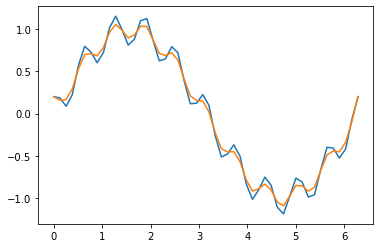

In [11]:
def moving_average(f):
    """Compute and return a three-point moving average of the data in f"""

    # Create array to hold the averaged data
    g = np.zeros(len(f))

    # Compute three-point moving average, working one position in from the
    # end of the array at each end
    for i in range(1, len(f) - 1):
        g[i] = (f[i-1] + f[i] + f[i+1])/3.0

    # Set end values equal to f (how to handle end values is ambiguous)
    g[0] = f[0]
    g[-1] = f[-1]

    return g
          
# Create x and f arrays    
x = np.linspace(0, 2.0*np.pi, 50)
f = np.sin(x) + 0.2*np.cos(10*x) 

# Compute average
y = moving_average(f)

# Plot
plt.plot(x, f)
plt.plot(x, y)
plt.show()

(b) Image/matrix convolution.

First read the image:

Image array shape (pixels): (250, 359)
<class 'numpy.ndarray'>


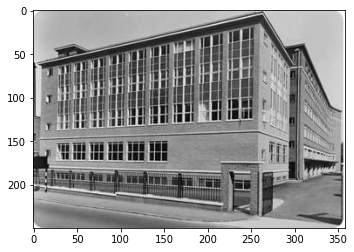

In [12]:
A = plt.imread("https://github.com/CambridgeEngineering/PartIA-Computing-Examples-Papers/raw/master/images/southwing.png")
plt.imshow(A, cmap='gray');
print("Image array shape (pixels): {}".format(A.shape))
print(type(A))

Create the edge detection 'filter':

In [13]:
G = np.array([[-1, -1, -1], [-1, 8, -1,], [-1, -1, -1,]])
print(G)

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


Create zero matrix with same shape as $A$ to hold the convolved matrix:

In [14]:
B = np.zeros(A.shape)

Implement the convolution algorithm (this a generalisation of the 1D moving average problem):

In [15]:
for i in range(1, B.shape[0] - 1):
    for j in range(1, B.shape[1] - 1):
        for k in range(3):
            for l in range(3):
                B[i, j] += G[k, l]*A[i - 1 + k, j - 1 + l]

Note that the ranges for `i` and `j` are such that we do not index outside of the image.

Displaying the convolved matrix:

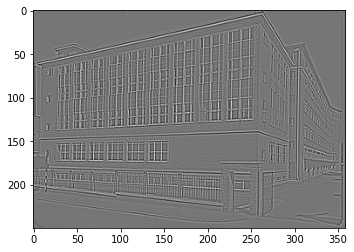

In [16]:
plt.imshow(B, cmap='gray');

It is clear now why this is known as an 'edge detection' filter - it identifies edges in the image.

(b) The algorithm involves looping over each pixel (there are $pq$ pixels) with fixed work per pixel, hence it has cost $O(pq)$.

## Question 6

We first fetch the sound clip so it can be played:

In [17]:
url = "https://www.nasa.gov/62284main_onesmall2.wav"
Audio(url)

In [18]:
# Fetch sound file
local_filename, headers = urllib.request.urlretrieve(url)

# Read frequency and data array for sound track
fs, x = scipy.io.wavfile.read(local_filename) 

print(fs)

# If we have a stero track, take just one channel
if len(x.shape) > 1:
    x = x[:, 0]

# Check that it plays
Audio(x, rate=fs)

11025


We can plot the sound signal:

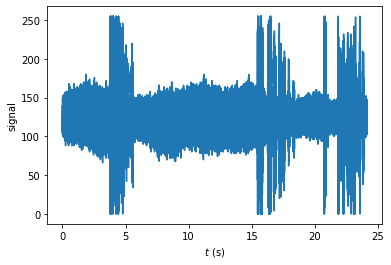

In [19]:
# Time points (0 to T, with T*fs points)
t = np.linspace(0, len(x)/fs, len(x), endpoint=False)

# Plot signal
plt.plot(t, x)
plt.xlabel('$t$ (s)')
plt.ylabel('signal');

Perform a discrete Fourier transform to 'break' the signal into frequencies: 

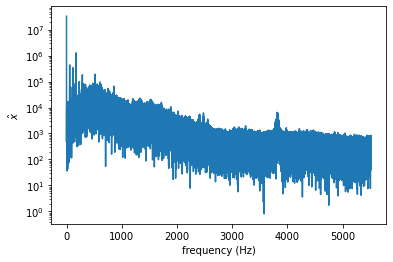

In [20]:
# Fourier transform (real version)
xf = np.fft.rfft(x)

# Create frequency axis
freq = np.linspace(0.0, fs/2, len(xf))

plt.semilogy(freq, np.abs(xf))
plt.xlabel('frequency (Hz)')
plt.ylabel('$\hat{x}$');

We now try cutting out some low and high frequencies:

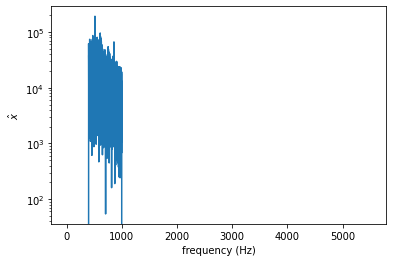

In [21]:
# Create copy of the transformed signal
xf_filtered = xf.copy()

# Cut-off frequencies (Hz)
cutoff_freq_low = 400
cutoff_freq_high = 1000

# Determine index of the cut-off frequencies
n_cut_low = int(2*cutoff_freq_low*len(xf_filtered)/fs)
n_cut_high = int(2*cutoff_freq_high*len(xf_filtered)/fs)

# Eliminate frequencies
xf_filtered[:n_cut_low] = 0.0
xf_filtered[n_cut_high:] = 0.0

# Plot filtered signal
plt.semilogy(freq, np.abs(xf_filtered))
plt.xlabel('frequency (Hz)')
plt.ylabel('$\hat{x}$');

It is clear that some frequencies have been eliminated.

To listen to the signal, we convert back to the time domain with an inverse transform:

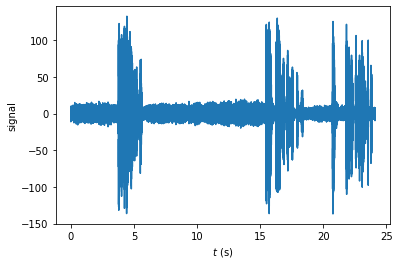

In [22]:
# Inverse transform of filtered sigal
x_filtered = np.fft.irfft(xf_filtered)

# Plot signal
plt.plot(t, x_filtered)
plt.xlabel('$t$ (s)')
plt.ylabel('signal');

Play filtered signal:

In [23]:
Audio(x_filtered, rate=fs)

For reference, here is the original track:

In [24]:
Audio(x, rate=fs)

Cutting out frequencies below 400 Hz and belows eliminates some background noise.

## Question 7

(a) First implement a function for Newton's method:

In [25]:
def newton_1d(g, dgdx, x0, tol, max_it=50):
    r0 = np.abs(g(x0))
    for i in range(max_it):
        x = x0 - g(x0)/dgdx(x0)  # Compute x_{n+1} = x_n - (dg/dx)^-1 * g_n
        x0 = x  # x_{n} <- x_{n+1}

        # Check for convergence
        r = np.abs(g(x0))
        print("Relative residual: {}".format(r/r0))
        if r/r0 < tol:
            return x

    return None

Test for quadratic function $f(x) = x^2$:

In [26]:
def f(x):
    return x**2
    
def dfdx(x):
    return 2*x

def d2fdx2(x):
    return 2.0

x_opt = newton_1d(dfdx, d2fdx2, 1.0, 1.0e-8)
print("Optimal x and f(x):", x_opt, f(x_opt))

Relative residual: 0.0
Optimal x and f(x): 0.0 0.0


Test for cubic function $f(x) = x^3 + x^2$:

In [27]:
def f(x):
    return x**3 + x**2
    
def dfdx(x):
    return 3*x**2 + 2*x

def d2fdx2(x):
    return 6*x + 2

x_opt = newton_1d(dfdx, d2fdx2, 0.5, 1.0e-8)
print("Optimal x and f(x):", x_opt, f(x_opt))

Relative residual: 0.21000000000000002
Relative residual: 0.02752972651605234
Relative residual: 0.0008691115503938429
Relative residual: 9.869002257016487e-07
Relative residual: 1.2783316993218436e-12
Optimal x and f(x): 1.1185402369047364e-12 1.2511322615763033e-24


### Extra discussion points for supervisions

- Test for $f(x) = x^3$ close to $x=0$. Convergence is slow because of the shape of the function
- Significance of the intial guess for convergence rate and for problems with multiple minima
- Can show that asymptpio rate of convregence is quadratic via a Taylor series

(b) First implement a function for Newton's method for $n$ varaibles:

In [28]:
def newton(g, J, x0, tol, max_it=100):
    r0 = np.linalg.norm(g(x0))  # Could have used r0 = np.sqrt(g(x0).dot(g(x0)))
    for i in range(max_it):
        x = x0 - np.linalg.solve(J(x0), g(x0))  # Compute x_{n+1} = x_n - J^-1 g_n
        x0 = x  # x_{n} <- x_{n+1}

        # Check for convergence
        r = np.linalg.norm(g(x0))
        print("Relative residual: {}".format(r/r0))
        if r/r0 < tol:
            return x

    return None

Implement functions for function $f$, and the derivatives of $f$ ($\boldsymbol{g}$ 
and $\boldsymbol{J}$):

In [29]:
def f(x):
    return (a - x[0])**2 + b*(x[1] - x[0]**2)**2
    
def g(x):
    return np.array([-2*(a - x[0]) - 4*x[0]*b*(x[1] - x[0]**2), 
                     2*b*(x[1] - x[0]**2)])

def J(x):
    ddf_ddx  = 2 - 4*b*(x[1] - x[0]**2) + 8*b*x[0]**2
    ddf_dxdy = -4*b*x[0]
    ddf_ddy = 2*b
    return np.array([[ddf_ddx, ddf_dxdy], [ddf_dxdy, ddf_ddy]])     

Set $a$ and $b$, and call the Newton function:

In [30]:
a, b = 2, 100
x = newton(g, J, [1.1, 1.1], 1.0e-9)

print("f_min:", f(x))
print("x at f_min:", x)

Relative residual: 0.020741586063277816
Relative residual: 6.284844795657698
Relative residual: 0.007670117085122962
Relative residual: 0.6356510917100644
Relative residual: 7.241299898944863e-06
Relative residual: 5.583845786720195e-07
Relative residual: 7.114711126311004e-15
f_min: 1.9770826437101608e-29
x at f_min: [2. 4.]


Extension: To get a sense of the Rosenbrock function, we can plot it:

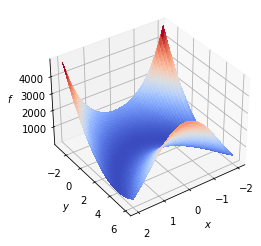

In [31]:
N = 50  # 50 points in each direction
x = np.linspace(-2, 2, N)
y = np.linspace(-3, 6, N)

X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.gca(projection='3d')

F = f([X, Y])

surf = ax.plot_surface(X, Y, F, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
                                              
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f$')

ax.view_init(elev=35, azim=55);

(c) Newton's method will converge in one iteration if $f$ is a quadratic function (in which case the matrix $J$ does not depend on $\boldsymbol{x}$).

(d) 

- Check that a quadratic functions converges in one iteration, e.g. 
$f(\boldsymbol{x}) = x_{0}^2 + x_{1}^{2}$
- Test functions with known minima locations

## Question 8

(a) Construct a class that has *methods* for $f$, $\boldsymbol{g}$ and $\boldsymbol{J}$:

In [32]:
class Rosenbrock:
    """A class that represents the Rosenbrock function"""

    def __init__(self, a, b):
        """Initialiser that takes the a and b parameters"""
        self.a = a
        self.b = b

    def f(self, x):
        """Return function evaluated at x"""
        return (self.a - x[0])**2 + self.b*(x[1] - x[0]**2)**2
    
    def g(self, x):
        """Return 'g' vector evaluated at x"""
        return np.array([-2*(self.a - x[0]) - 4*x[0]*self.b*(x[1] - x[0]**2), 
                         2*self.b*(x[1] - x[0]**2)])

    def J(self, x):
        """Return 'J' matrix evaluated at x"""
        d2f_dx2  = 2 - 4*self.b*(x[1] - x[0]**2) + 8*self.b*x[0]**2
        d2f_dxdy = -4*self.b*x[0]
        d2f_dy2 = 2*self.b
        return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])     

Modify the Newton algorithm:

In [33]:
def newton(problem, x0, tol, max_it=100):
    r0 = np.linalg.norm(problem.g(x0))
    for i in range(max_it):
        x = x0 - np.linalg.solve(problem.J(x0), problem.g(x0))
        x0 = x

        # Check for convergence
        r = np.linalg.norm(g(x0))
        print("Relative residual: {}".format(r/r0))
        if r/r0 < tol:
            return x
    return None

Test on problem from previous question:

In [34]:
rosenbrock_problem = Rosenbrock(2, 100) 
x = newton(rosenbrock_problem, [1.1, 1.1], 1.0e-9)

print("f_min:", rosenbrock_problem.f(x))
print("x at f_min:", x)

Relative residual: 0.020741586063277816
Relative residual: 6.284844795657698
Relative residual: 0.007670117085122962
Relative residual: 0.6356510917100644
Relative residual: 7.241299898944863e-06
Relative residual: 5.583845786720195e-07
Relative residual: 7.114711126311004e-15
f_min: 1.9770826437101608e-29
x at f_min: [2. 4.]


---
## Copyright and license

© Copyright 2017-2021 Garth N. Wells (<gnw20@cam.ac.uk>)

### Notebook text 

This work is licensed under the Creative Commons
Attribution-ShareAlike 4.0 International License. To view a copy of
this license, visit <https://creativecommons.org/licenses/by-sa/4.0/>.

### Notebook code

This work is licensed under the MIT License. To view a copy of
this license, visit <https://opensource.org/licenses/MIT>.